# Can we make a change on climate change?
#### EPA1333 Final Assignment
### Introduction
Regardless of the many debates over the impact of humans on climate change, global warming is an observable fact. According to NASA, highest 16 global temperatures have been recorded since 2001, the arctic ice shrank to a minimum in 2012, and carbon dioxide levels in the air are higher than ever!

Data analysis can help us better understand how the climate has changed, why, to make predictions for the future years, and to evaluate measures on how to suppress these changes. In this assignment you receive climate change data from World Bank, and are expected to perform an original and non-trivial analysis using Python.

### Data

#### Climate change indicators
The climate change data offered by World Bank contains a large set of indicators, such as for example CO2 emissions, population growth or renewable energy output. Values of these indicators are available per country and per year. You can download the data in *.csv format from https://data.worldbank.org/topic/climate-change.

In [125]:
# import standard library
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [126]:
# load world bank data
# skip the unneeded header
wb = pd.read_csv('world_bank/API_19_DS2_en_csv_v2.csv', sep=',', header=0, skiprows=3) 

# read_csv resulted in additional blank series at the last column -> drop the column
wb = wb.drop(wb.columns[[61]], 1)

# display the head of dataframe
wb.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,Urban population (% of total),SP.URB.TOTL.IN.ZS,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,...,44.147000,43.783000,43.421000,43.059000,42.698000,42.364000,42.058000,41.779000,41.528000,41.304000
1,Aruba,ABW,Urban population,SP.URB.TOTL,27526.000000,28141.000000,28532.000000,28761.000000,28924.000000,29082.000000,...,44686.000000,44375.000000,44052.000000,43778.000000,43575.000000,43456.000000,43398.000000,43365.000000,43331.000000,43296.000000
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,3.117931,2.209658,1.379868,0.799404,0.565140,0.544773,...,-0.435429,-0.698401,-0.730549,-0.623935,-0.464782,-0.273466,-0.133557,-0.076069,-0.078435,-0.080806
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.000000,55438.000000,56225.000000,56695.000000,57032.000000,57360.000000,...,101220.000000,101353.000000,101453.000000,101669.000000,102053.000000,102577.000000,103187.000000,103795.000000,104341.000000,104822.000000
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,3.148037,2.238144,1.409622,0.832453,0.592649,0.573468,...,0.384060,0.131311,0.098616,0.212680,0.376985,0.512145,0.592914,0.587492,0.524658,0.459929


In [127]:
#load country metadata
wb_meta_country = pd.read_csv('world_bank/Metadata_Country_API_19_DS2_en_csv_v2.csv', sep=',', header=0) 

# read_csv resulted in additional blank series at the last column -> drop the column
wb_meta_country = wb_meta_country.drop(wb_meta_country.columns[[5]], 1)

# display the head of dataframe
wb_meta_country.head()


,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from offici...,Aruba
1,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,WB-3 code changed from ADO to AND to align wit...,Andorra


In [128]:
#load indicator metadata
wb_meta_indi = pd.read_csv('world_bank/Metadata_Indicator_API_19_DS2_en_csv_v2.csv', sep=',', header=0) 

# read_csv resulted in additional blank series at the last column -> drop the column
wb_meta_indi = wb_meta_indi.drop(wb_meta_indi.columns[[4]], 1)

# display the head of dataframe
wb_meta_indi.head()


,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION
0,SP.URB.TOTL.IN.ZS,Urban population (% of total),Urban population refers to people living in ur...,The United Nations Population Divisions World ...
1,SP.URB.TOTL,Urban population,Urban population refers to people living in ur...,World Bank Staff estimates based on United Nat...
2,SP.URB.GROW,Urban population growth (annual %),Urban population refers to people living in ur...,World Bank Staff estimates based on United Nat...
3,SP.POP.TOTL,"Population, total",Total population is based on the de facto defi...,(1) United Nations Population Division. World ...
4,SP.POP.GROW,Population growth (annual %),Annual population growth rate for year t is th...,Derived from total population. Population sour...


#### Climate data API
The Climate Data API provides programmatic access to most of the climate data used on the World Bank’s Climate Change Knowledge Portal. You can access this data directly from Python using requests. In addition to what was already downloadable as csv data, with this API you are able to access temperature, precipitation and basin level data. Read about it in more detail here: https://datahelpdesk.worldbank.org/knowledgebase/articles/902061-climate-data-api

Below is an example of how to access yearly temperature historical data per country from Python. You can select a country using its ISO aplha3 code: https://unstats.un.org/unsd/methodology/m49/.


In [129]:
import requests
r = requests.get('http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/ROU')
rou = r.json()
rou[:5]

[{'data': 9.215595, 'year': 1901},
 {'data': 8.389345, 'year': 1902},
 {'data': 9.500536, 'year': 1903},
 {'data': 8.901487, 'year': 1904},
 {'data': 9.12619, 'year': 1905}]

As with most data sources, you might find that you data contains missing values. Please handle them appropriately, for example by using interpolation.

#### Other resources
You are encouraged to find more data sources that will make your analysis more meaningful. Please make sure that you document everything carefully. Only use freely available datasets.

#### Assignment
* Create a Jupyter Notebook that contains your explanations and analyses.
* Start the notebook with a clear description of the type of analysis you are going to perform.
* The conceptual contents of the Notebook should be roughly similar to a normal written report of 10-20 pages.
* Some (minimum) properties of the Notebook and your analyses on which we will grade:
    * Required: Combine different data from multiple sources in your analyses.
    * Required: Use multiple types of visualizations of your results.
    * Required: Make sure your Notebook does not generate errors!
    * Required: You should use Python to answer your research questions. Your code should read, clean and format, process and visualize the data. There should be at least some non-trivial processing involved.
    * Whenever possible, make your Notebook read the data directly from the web. This way, your notebook will always use the most up-to-date data available. If not, document carefully where the data was collected what to do when you want to use more up-to-date data.
    * Demonstrate your skills in Python by using typical Python constructs and using the appropriate data structures (lists, dictionaries, tuples, arrays, dataframes, series, recursion, etc.)
    * Write clear, understandable code:
        * Document your code! Put comments when necessary.
        * Use sensible variable names.
        * Break up your code into parts. Use (fruitful) functions.
    * Try to think of reusability of your code. How easy would it be to use your same code if we want to try to do a small variations of your analysis? Can we easily adapt/play around with your code?
    * How difficult were your analyses?
* Make your Notebook self-explanatory. So, it should contain text (with references) as well as your actual analysis code and results.
* If you want to use other libraries for your analyses or visualizations, feel free to do so. However, only use free available and well-known libraries. The ones that come standard with Anaconda are fine. If you want to use something else, that you first need to install, check with us first.
* Create a zip archive and upload it on Brightspace.

#### Example
Here are some example questions you might ask to start the analysis. Please note that this is just an example and that you are expected to come up with your own questions and analyses.
* The EU has the following goal in the Paris agreement: "At least a 40% domestic reduction in greenhouse gases by 2030 compared to 1990 levels.” How is the EU doing at the moment? If they don’t change policy (i.e extrapolation of current trends) where will they end up? [source]
* Can you classify in good/neutral/bad countries?
* What is the trend per continent with respect to gas emissions? How do countries within the same continent behave? Is it fair to make statements over whole continents?
* Where do you find the highest increase in temperatures compared to 1960?
* Suppose that each country has a % growth or reduction of CO2, where do we end up?
* What are the countries with most gas emissions? How does that change when you normalize by their size / population?
* What is the country with the best trend in renewable energy over the last 10 years?

In [130]:
wb_co2_total = wb[ wb['Indicator Name'] == 'CO2 emissions from solid fuel consumption (% of total)']
wb_co2_total.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
41,Aruba,ABW,CO2 emissions from solid fuel consumption (% o...,EN.ATM.CO2E.SF.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
121,Afghanistan,AFG,CO2 emissions from solid fuel consumption (% o...,EN.ATM.CO2E.SF.ZS,30.973451,35.820896,43.085106,37.305699,35.807860,37.818182,...,32.903226,25.632084,22.697725,27.166378,35.170761,34.094783,39.362871,44.635514,NaN,NaN
201,Angola,AGO,CO2 emissions from solid fuel consumption (% o...,EN.ATM.CO2E.SF.ZS,22.666667,13.709677,7.763975,1.910828,6.287425,4.629630,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
281,Albania,ALB,CO2 emissions from solid fuel consumption (% o...,EN.ATM.CO2E.SF.ZS,16.123188,14.147910,14.732143,13.556338,16.545455,18.212479,...,1.867414,2.347024,8.877722,9.330144,10.216935,12.770724,10.861694,12.251443,NaN,NaN
361,Andorra,AND,CO2 emissions from solid fuel consumption (% o...,EN.ATM.CO2E.SF.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN


In [131]:
wb_co2_total.loc[:, ['Country Name', '1960']].T

,41,121,201,281,361,441,521,601,681,761,...,20361,20441,20521,20601,20681,20761,20841,20921,21001,21081
Country Name,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1960,NaN,30.9735,22.6667,16.1232,NaN,4.72698,0,8.00781,NaN,NaN,...,NaN,73.3235,NaN,54.7893,0,NaN,0,89.3586,NaN,NaN


In [132]:
wb_co2_total_year = wb_co2_total.iloc[:, 4:61]
wb_co2_total_year.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
121,30.973451,35.820896,43.085106,37.305699,35.807860,37.818182,39.261745,31.142857,27.245509,38.521401,...,32.903226,25.632084,22.697725,27.166378,35.170761,34.094783,39.362871,44.635514,NaN,NaN
201,22.666667,13.709677,7.763975,1.910828,6.287425,4.629630,5.660377,5.535055,6.140351,3.289474,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
281,16.123188,14.147910,14.732143,13.556338,16.545455,18.212479,18.678161,19.562244,19.212411,21.242938,...,1.867414,2.347024,8.877722,9.330144,10.216935,12.770724,10.861694,12.251443,NaN,NaN
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN


In [133]:
wb_co2_total_country =  wb_co2_total.iloc[:,0:2]
wb_co2_total_country.head()

,Country Name,Country Code
41,Aruba,ABW
121,Afghanistan,AFG
201,Angola,AGO
281,Albania,ALB
361,Andorra,AND


In [134]:
wb_co2 = wb_co2_total_country.join(wb_co2_total_year)

In [135]:
wb_co2_T = wb_co2.T
wb_co2_T.head()

,41,121,201,281,361,441,521,601,681,761,...,20361,20441,20521,20601,20681,20761,20841,20921,21001,21081
Country Name,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Country Code,ABW,AFG,AGO,ALB,AND,ARB,ARE,ARG,ARM,ASM,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
1960,NaN,30.9735,22.6667,16.1232,NaN,4.72698,0,8.00781,NaN,NaN,...,NaN,73.3235,NaN,54.7893,0,NaN,0,89.3586,NaN,NaN
1961,NaN,35.8209,13.7097,14.1479,NaN,4.16948,0,6.92126,NaN,NaN,...,NaN,71.7631,NaN,52.1741,0,NaN,0,88.5843,NaN,NaN
1962,NaN,43.0851,7.76398,14.7321,NaN,2.77449,0,3.7424,NaN,NaN,...,NaN,76.2652,27.2727,50.1664,0,NaN,0,88.2467,NaN,NaN


In [136]:
wb_co2_T.columns = wb_co2_T.iloc[0]
#df.columns = df.iloc[1]
wb_co2_T.head()

Country Name,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Country Name,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Country Code,ABW,AFG,AGO,ALB,AND,ARB,ARE,ARG,ARM,ASM,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
1960,NaN,30.9735,22.6667,16.1232,NaN,4.72698,0,8.00781,NaN,NaN,...,NaN,73.3235,NaN,54.7893,0,NaN,0,89.3586,NaN,NaN
1961,NaN,35.8209,13.7097,14.1479,NaN,4.16948,0,6.92126,NaN,NaN,...,NaN,71.7631,NaN,52.1741,0,NaN,0,88.5843,NaN,NaN
1962,NaN,43.0851,7.76398,14.7321,NaN,2.77449,0,3.7424,NaN,NaN,...,NaN,76.2652,27.2727,50.1664,0,NaN,0,88.2467,NaN,NaN


In [137]:
wb_co2_T = wb_co2_T.drop(['Country Code'])


In [138]:
wb_co2_T.tail()

Country Name,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
2012,0,34.0948,0,12.7707,0,1.34827,3.2016,2.2495,0.128783,NaN,...,NaN,36.7806,0,42.4481,0,NaN,2.53388,84.8578,9.5,43.1529
2013,0,39.3629,0,10.8617,0,1.25332,4.18242,1.25355,0.0667111,NaN,...,NaN,38.254,0,42.2184,0,NaN,1.92723,83.8436,11.5848,59.7362
2014,0,44.6355,0,12.2514,0,1.46711,3.74213,2.85416,0,NaN,...,NaN,42.2831,0,41.7757,0,NaN,2.21325,84.6558,10.7492,63.9719
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


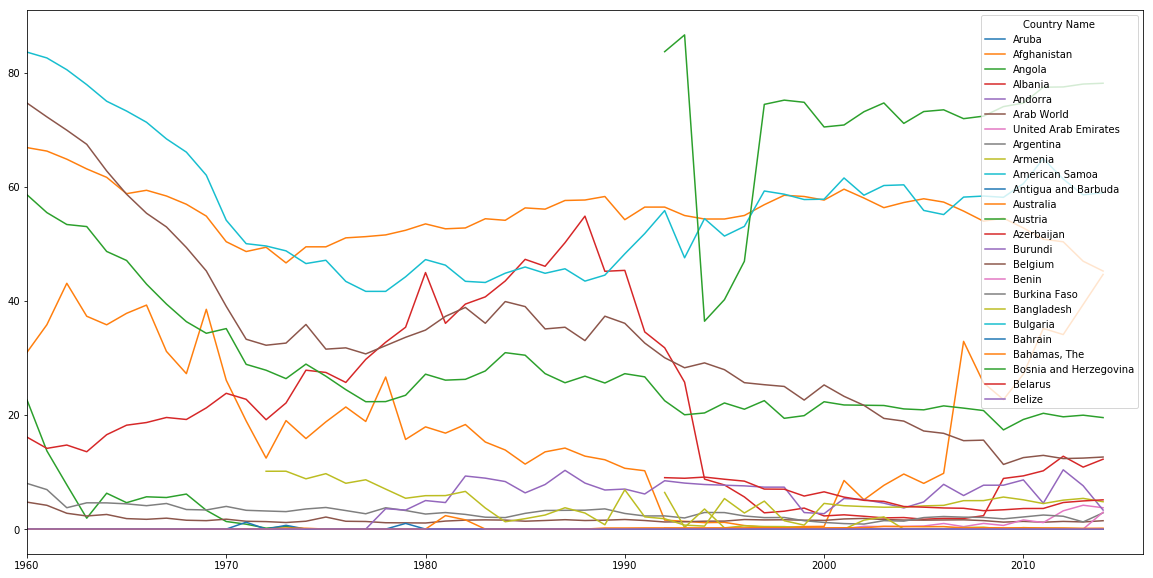

In [139]:
wb_co2_T.iloc[1:,:25].plot(figsize=(20,10))

In [140]:
 wb_co2_T.iloc[-3, :].head()

Country Name
Aruba                0
Afghanistan    44.6355
Angola               0
Albania        12.2514
Andorra              0
Name: 2014, dtype: object

In [141]:
co2_2016 = wb_co2_T.iloc[[-3], :]
co2_2016.column = list(range(co2_2016.shape[1]))

In [142]:
co2_2016

Country Name,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
2014,0,44.6355,0,12.2514,0,1.46711,3.74213,2.85416,0,NaN,...,NaN,42.2831,0,41.7757,0,NaN,2.21325,84.6558,10.7492,63.9719


In [143]:
co2_2016.T.shape

(264, 1)

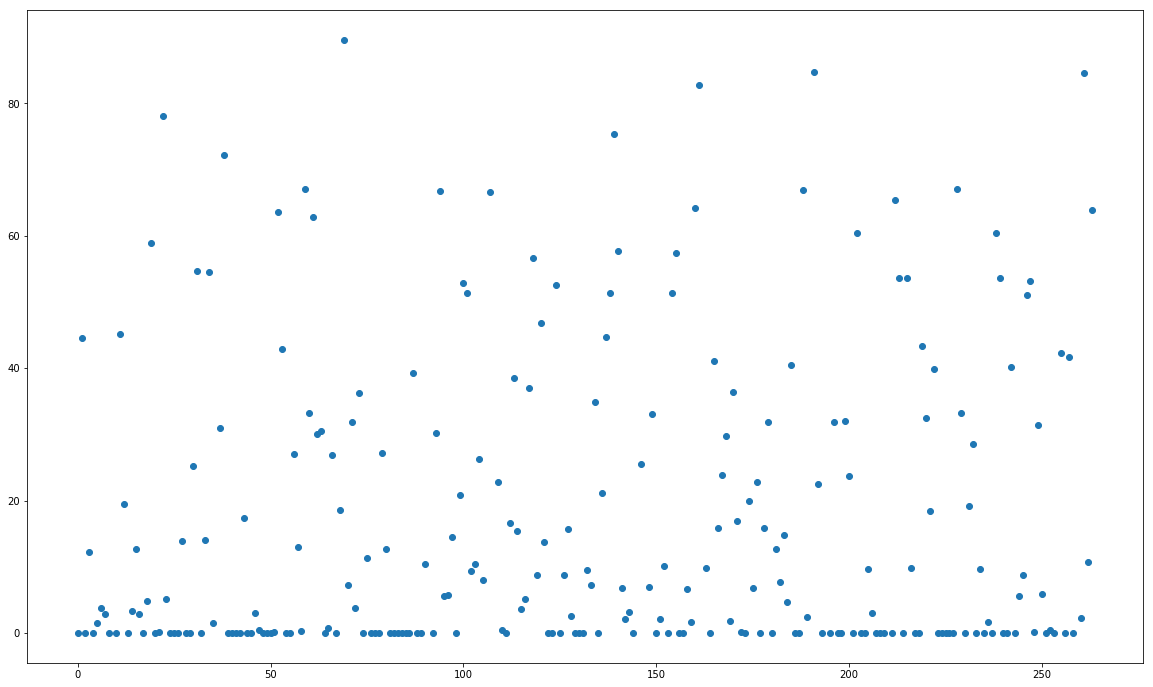

In [144]:
x = range(0,co2_2016.T.shape[0])
plt.figure(figsize=(20, 12))
plt.scatter(x, co2_2016.T, )

In [145]:
wb_co2_T.iloc[[-3], :]

Country Name,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
2014,0,44.6355,0,12.2514,0,1.46711,3.74213,2.85416,0,NaN,...,NaN,42.2831,0,41.7757,0,NaN,2.21325,84.6558,10.7492,63.9719


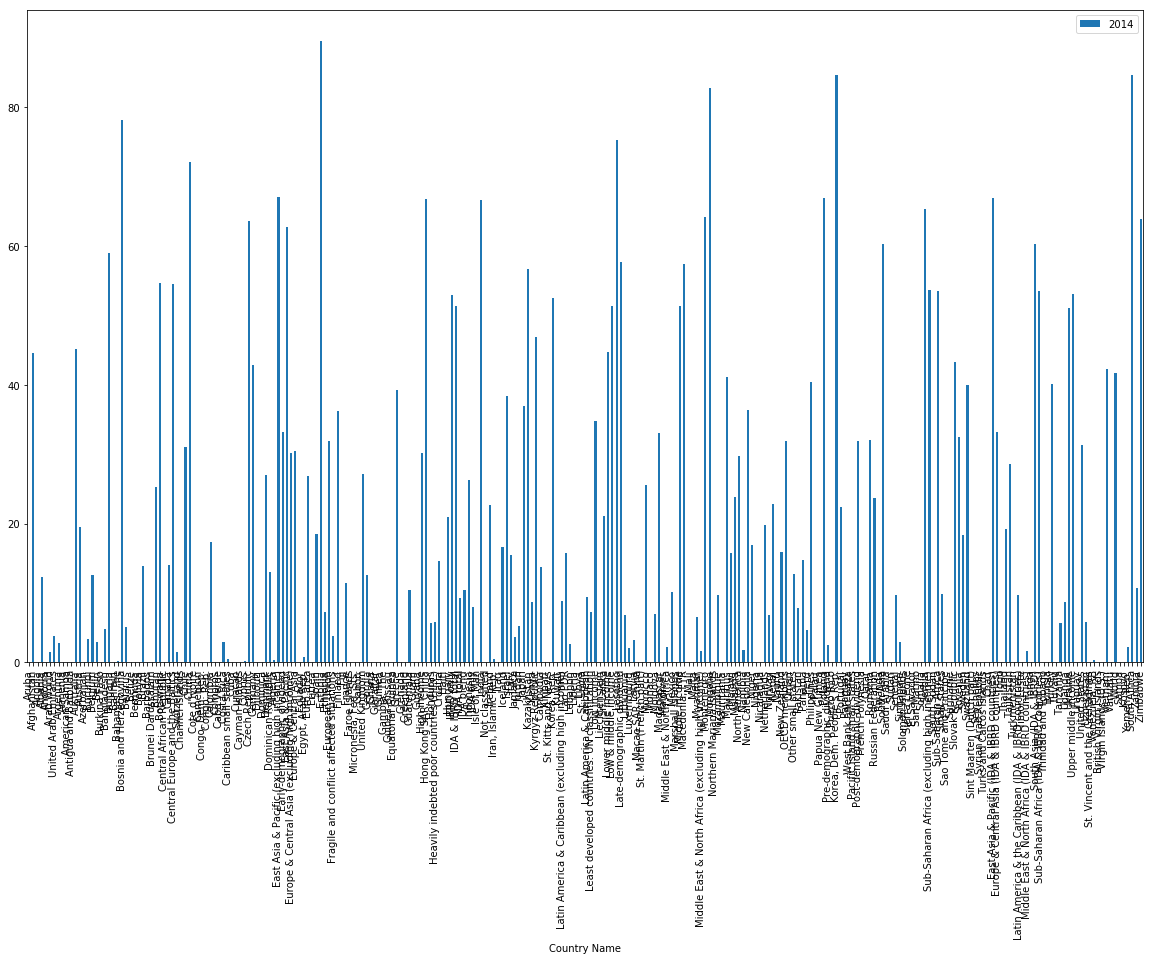

In [146]:
co2_2016.T.plot(kind = 'bar', figsize=(20, 12))

In [147]:
wb_co2_T.iloc[0:4, :]

Country Name,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Country Name,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1960,NaN,30.9735,22.6667,16.1232,NaN,4.72698,0,8.00781,NaN,NaN,...,NaN,73.3235,NaN,54.7893,0,NaN,0,89.3586,NaN,NaN
1961,NaN,35.8209,13.7097,14.1479,NaN,4.16948,0,6.92126,NaN,NaN,...,NaN,71.7631,NaN,52.1741,0,NaN,0,88.5843,NaN,NaN
1962,NaN,43.0851,7.76398,14.7321,NaN,2.77449,0,3.7424,NaN,NaN,...,NaN,76.2652,27.2727,50.1664,0,NaN,0,88.2467,NaN,NaN


In [148]:
# load world bank data
country_class_y = pd.read_csv('world_bank/CCPI_2017.csv', sep=',', header=0) 
country_class_y

,Countries,Label
0,France,Good
1,Sweden,Good
2,United Kingdom,Good
3,Cyprus,Good
4,Luxembourg,Good
5,Malta,Good
6,Portugal,Good
7,Belgium,Good
8,Denmark,Good
9,Switzerland,Good


In [149]:
wb_meta_country[['Country Code', 'TableName']].head()

,Country Code,TableName
0,ABW,Aruba
1,AFG,Afghanistan
2,AGO,Angola
3,ALB,Albania
4,AND,Andorra


In [150]:
df = pd.DataFrame()
for country in country_class_y['Countries']:
    #print(country)
    df1 = wb[wb['Country Name'] == country]
    df = pd.concat( [df,df1], ignore_index=True, axis=0)
        

In [151]:
df.shape
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,France,FRA,Urban population (% of total),SP.URB.TOTL.IN.ZS,6.188000e+01,6.260700e+01,6.348900e+01,6.470200e+01,6.589800e+01,6.707100e+01,...,7.762100e+01,7.786400e+01,7.810600e+01,7.834500e+01,7.858400e+01,7.882000e+01,7.905500e+01,7.928900e+01,7.952000e+01,7.975000e+01
1,France,FRA,Urban population,SP.URB.TOTL,2.896865e+07,2.970374e+07,3.055068e+07,3.157696e+07,3.258617e+07,3.355144e+07,...,4.969004e+07,5.012494e+07,5.054008e+07,5.094580e+07,5.134897e+07,5.175305e+07,5.217517e+07,5.259394e+07,5.297946e+07,5.334965e+07
2,France,FRA,Urban population growth (annual %),SP.URB.GROW,2.424503e+00,2.505858e+00,2.811428e+00,3.304057e+00,3.146026e+00,2.919203e+00,...,9.335545e-01,8.714278e-01,8.248035e-01,7.995637e-01,7.882418e-01,7.838471e-01,8.123421e-01,7.994288e-01,7.303273e-01,6.963089e-01
3,France,FRA,"Population, total",SP.POP.TOTL,4.681424e+07,4.744475e+07,4.811965e+07,4.880368e+07,4.944940e+07,5.002377e+07,...,6.401623e+07,6.437499e+07,6.470704e+07,6.502751e+07,6.534278e+07,6.565979e+07,6.599857e+07,6.633196e+07,6.662407e+07,6.689611e+07
4,France,FRA,Population growth (annual %),SP.POP.GROW,1.229610e+00,1.337853e+00,1.412470e+00,1.411512e+00,1.314427e+00,1.154839e+00,...,6.187115e-01,5.588574e-01,5.144864e-01,4.940375e-01,4.836449e-01,4.839823e-01,5.146361e-01,5.038712e-01,4.394107e-01,4.074910e-01


In [152]:
df_ct_null = df.isnull()
df_ct_null.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [153]:
df_ct_null_drop = df_ct_null.drop(df_ct_null.columns[[0,1,2,3]], 1)
df_ct_null_drop.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [154]:
df_ct_null_drop.sum().min()

695

In [155]:
df_ct_null_drop.sum().idxmin()

'2000'

In [156]:
df_ct_null_drop.shape

(4480, 57)

In [157]:
df.dropna(inplace = False).shape

(332, 61)

In [158]:
df.shape

(4480, 61)

In [159]:
df_2000 = df[['Country Name','Indicator Name','2000']]
df_2000.head()

,Country Name,Indicator Name,2000
0,France,Urban population (% of total),7.587100e+01
1,France,Urban population,4.621492e+07
2,France,Urban population growth (annual %),1.024238e+00
3,France,"Population, total",6.091250e+07
4,France,Population growth (annual %),6.849309e-01


In [160]:
#df[['label']]
country_class_y.columns = ['Country Name', 'Label']
country_class_y.head()

,Country Name,Label
0,France,Good
1,Sweden,Good
2,United Kingdom,Good
3,Cyprus,Good
4,Luxembourg,Good


In [161]:
df_2000_label = pd.merge(df_2000, country_class_y, on="Country Name", how="outer" )
df_2000_label.head()
df_2000_label.shape

(4480, 4)

In [162]:
# preprocessing data
df_2000_label_good = df_2000_label[(df_2000_label['Indicator Name'] == 'Urban population (% of total)') & (df_2000_label['Label'] == 'Good')]

df_2000_label_good

,Country Name,Indicator Name,2000,Label
0,France,Urban population (% of total),75.871,Good
80,Sweden,Urban population (% of total),84.026,Good
160,United Kingdom,Urban population (% of total),78.651,Good
240,Cyprus,Urban population (% of total),68.648,Good
320,Luxembourg,Urban population (% of total),84.216,Good
400,Malta,Urban population (% of total),92.368,Good
480,Portugal,Urban population (% of total),54.399,Good
560,Belgium,Urban population (% of total),97.128,Good
640,Denmark,Urban population (% of total),85.100,Good
720,Switzerland,Urban population (% of total),73.322,Good


In [163]:
len(wb_meta_indi['INDICATOR_NAME'])

80

In [165]:
list_deleted_indi = []
list_saved_indi = []
df_test = pd.DataFrame()

for label in country_class_y['Label'].unique():
    for indicator in wb_meta_indi['INDICATOR_NAME']:
        df_temp = pd.DataFrame()
        df_temp = df_2000_label[(df_2000_label['Indicator Name'] == indicator) & (df_2000_label['Label'] == label)]
        
        df_temp = df_temp.fillna(df_temp.mean())
        # df_temp.interpolate(method=’polynomial’, order=4)
        print(df_temp)
        
        if(df_temp['2000'].isnull().values.all()):
            list_deleted_indi.append(indicator) 
        else:
            list_saved_indi.append(indicator) 
            
        df_test = pd.concat([df_test,df_temp], ignore_index=True, axis=0)
        
print(list_deleted_indi)
df_test

       Country Name                 Indicator Name    2000 Label
0            France  Urban population (% of total)  75.871  Good
80           Sweden  Urban population (% of total)  84.026  Good
160  United Kingdom  Urban population (% of total)  78.651  Good
240          Cyprus  Urban population (% of total)  68.648  Good
320      Luxembourg  Urban population (% of total)  84.216  Good
400           Malta  Urban population (% of total)  92.368  Good
480        Portugal  Urban population (% of total)  54.399  Good
560         Belgium  Urban population (% of total)  97.128  Good
640         Denmark  Urban population (% of total)  85.100  Good
720     Switzerland  Urban population (% of total)  73.322  Good
800          Latvia  Urban population (% of total)  68.067  Good
880           Italy  Urban population (% of total)  67.222  Good
960         Croatia  Urban population (% of total)  55.587  Good
       Country Name    Indicator Name        2000 Label
1            France  Urban populat

       Country Name                                     Indicator Name  \
23           France  Population in urban agglomerations of more tha...   
103          Sweden  Population in urban agglomerations of more tha...   
183  United Kingdom  Population in urban agglomerations of more tha...   
263          Cyprus  Population in urban agglomerations of more tha...   
343      Luxembourg  Population in urban agglomerations of more tha...   
423           Malta  Population in urban agglomerations of more tha...   
503        Portugal  Population in urban agglomerations of more tha...   
583         Belgium  Population in urban agglomerations of more tha...   
663         Denmark  Population in urban agglomerations of more tha...   
743     Switzerland  Population in urban agglomerations of more tha...   
823          Latvia  Population in urban agglomerations of more tha...   
903           Italy  Population in urban agglomerations of more tha...   
983         Croatia  Population in urb

Empty DataFrame
Columns: [Country Name, Indicator Name, 2000, Label]
Index: []
Empty DataFrame
Columns: [Country Name, Indicator Name, 2000, Label]
Index: []
        Country Name      Indicator Name        2000 Label
48            France  CO2 emissions (kt)  362226.260  Good
128           Sweden  CO2 emissions (kt)   49350.486  Good
208   United Kingdom  CO2 emissions (kt)  541784.582  Good
288           Cyprus  CO2 emissions (kt)    6930.630  Good
368       Luxembourg  CO2 emissions (kt)    8239.749  Good
448            Malta  CO2 emissions (kt)    2064.521  Good
528         Portugal  CO2 emissions (kt)   62731.369  Good
608          Belgium  CO2 emissions (kt)  115118.131  Good
688          Denmark  CO2 emissions (kt)   51330.666  Good
768      Switzerland  CO2 emissions (kt)   39049.883  Good
848           Latvia  CO2 emissions (kt)    6351.244  Good
928            Italy  CO2 emissions (kt)  450564.290  Good
1008         Croatia  CO2 emissions (kt)   19339.758  Good
        Country 

        Country Name                                     Indicator Name  \
74            France  Urban land area where elevation is below 5 met...   
154           Sweden  Urban land area where elevation is below 5 met...   
234   United Kingdom  Urban land area where elevation is below 5 met...   
314           Cyprus  Urban land area where elevation is below 5 met...   
394       Luxembourg  Urban land area where elevation is below 5 met...   
474            Malta  Urban land area where elevation is below 5 met...   
554         Portugal  Urban land area where elevation is below 5 met...   
634          Belgium  Urban land area where elevation is below 5 met...   
714          Denmark  Urban land area where elevation is below 5 met...   
794      Switzerland  Urban land area where elevation is below 5 met...   
874           Latvia  Urban land area where elevation is below 5 met...   
954            Italy  Urban land area where elevation is below 5 met...   
1034         Croatia  Urb

2259   6.6  Neutral  
          Country Name                                     Indicator Name  \
1060           Romania  Terrestrial protected areas (% of total land a...   
1140         Lithuania  Terrestrial protected areas (% of total land a...   
1220             India  Terrestrial protected areas (% of total land a...   
1300           Ireland  Terrestrial protected areas (% of total land a...   
1380         Indonesia  Terrestrial protected areas (% of total land a...   
1460  Egypt, Arab Rep.  Terrestrial protected areas (% of total land a...   
1540    Czech Republic  Terrestrial protected areas (% of total land a...   
1620            Greece  Terrestrial protected areas (% of total land a...   
1700   Slovak Republic  Terrestrial protected areas (% of total land a...   
1780       Netherlands  Terrestrial protected areas (% of total land a...   
1860            Mexico  Terrestrial protected areas (% of total land a...   
1940           Germany  Terrestrial protected areas (%

Empty DataFrame
Columns: [Country Name, Indicator Name, 2000, Label]
Index: []
Empty DataFrame
Columns: [Country Name, Indicator Name, 2000, Label]
Index: []
          Country Name      Indicator Name         2000    Label
1088           Romania  CO2 emissions (kt)    90681.243  Neutral
1168         Lithuania  CO2 emissions (kt)    12163.439  Neutral
1248             India  CO2 emissions (kt)  1031853.463  Neutral
1328           Ireland  CO2 emissions (kt)    41228.081  Neutral
1408         Indonesia  CO2 emissions (kt)   263418.945  Neutral
1488  Egypt, Arab Rep.  CO2 emissions (kt)   141326.180  Neutral
1568    Czech Republic  CO2 emissions (kt)   123849.258  Neutral
1648            Greece  CO2 emissions (kt)    91616.328  Neutral
1728   Slovak Republic  CO2 emissions (kt)    35885.262  Neutral
1808       Netherlands  CO2 emissions (kt)   173504.105  Neutral
1888            Mexico  CO2 emissions (kt)   398382.880  Neutral
1968           Germany  CO2 emissions (kt)   829977.779  Neutr

2311             Spain  Forest area (sq. km)  169769.4  Neutral
          Country Name                                     Indicator Name  \
1112           Romania  Land area where elevation is below 5 meters (%...   
1192         Lithuania  Land area where elevation is below 5 meters (%...   
1272             India  Land area where elevation is below 5 meters (%...   
1352           Ireland  Land area where elevation is below 5 meters (%...   
1432         Indonesia  Land area where elevation is below 5 meters (%...   
1512  Egypt, Arab Rep.  Land area where elevation is below 5 meters (%...   
1592    Czech Republic  Land area where elevation is below 5 meters (%...   
1672            Greece  Land area where elevation is below 5 meters (%...   
1752   Slovak Republic  Land area where elevation is below 5 meters (%...   
1832       Netherlands  Land area where elevation is below 5 meters (%...   
1912            Mexico  Land area where elevation is below 5 meters (%...   
1992        

            Country Name                       Indicator Name       2000 Label
2335             Hungary  Agriculture, value added (% of GDP)   5.727957   Bad
2415              Poland  Agriculture, value added (% of GDP)   3.486802   Bad
2495           Argentina  Agriculture, value added (% of GDP)   5.053021   Bad
2575            Bulgaria  Agriculture, value added (% of GDP)  12.579550   Bad
2655              Norway  Agriculture, value added (% of GDP)   2.066929   Bad
2735             Iceland  Agriculture, value added (% of GDP)   8.396788   Bad
2815              Brazil  Agriculture, value added (% of GDP)   5.523278   Bad
2895             Austria  Agriculture, value added (% of GDP)   1.849495   Bad
2975            Thailand  Agriculture, value added (% of GDP)   8.502900   Bad
3055       United States  Agriculture, value added (% of GDP)   1.189219   Bad
3135            Malaysia  Agriculture, value added (% of GDP)   8.599302   Bad
3215             Ukraine  Agriculture, value added (

4437    1.653108   Bad  
            Country Name                                     Indicator Name  \
2358             Hungary  Total greenhouse gas emissions (kt of CO2 equi...   
2438              Poland  Total greenhouse gas emissions (kt of CO2 equi...   
2518           Argentina  Total greenhouse gas emissions (kt of CO2 equi...   
2598            Bulgaria  Total greenhouse gas emissions (kt of CO2 equi...   
2678              Norway  Total greenhouse gas emissions (kt of CO2 equi...   
2758             Iceland  Total greenhouse gas emissions (kt of CO2 equi...   
2838              Brazil  Total greenhouse gas emissions (kt of CO2 equi...   
2918             Austria  Total greenhouse gas emissions (kt of CO2 equi...   
2998            Thailand  Total greenhouse gas emissions (kt of CO2 equi...   
3078       United States  Total greenhouse gas emissions (kt of CO2 equi...   
3158            Malaysia  Total greenhouse gas emissions (kt of CO2 equi...   
3238             Ukraine  T

4461   0.000000   Bad  
            Country Name                                     Indicator Name  \
2382             Hungary  Electricity production from natural gas source...   
2462              Poland  Electricity production from natural gas source...   
2542           Argentina  Electricity production from natural gas source...   
2622            Bulgaria  Electricity production from natural gas source...   
2702              Norway  Electricity production from natural gas source...   
2782             Iceland  Electricity production from natural gas source...   
2862              Brazil  Electricity production from natural gas source...   
2942             Austria  Electricity production from natural gas source...   
3022            Thailand  Electricity production from natural gas source...   
3102       United States  Electricity production from natural gas source...   
3182            Malaysia  Electricity production from natural gas source...   
3262             Ukraine  El

,Country Name,Indicator Name,2000,Label
0,France,Urban population (% of total),7.587100e+01,Good
1,Sweden,Urban population (% of total),8.402600e+01,Good
2,United Kingdom,Urban population (% of total),7.865100e+01,Good
3,Cyprus,Urban population (% of total),6.864800e+01,Good
4,Luxembourg,Urban population (% of total),8.421600e+01,Good
5,Malta,Urban population (% of total),9.236800e+01,Good
6,Portugal,Urban population (% of total),5.439900e+01,Good
7,Belgium,Urban population (% of total),9.712800e+01,Good
8,Denmark,Urban population (% of total),8.510000e+01,Good
9,Switzerland,Urban population (% of total),7.332200e+01,Good


In [166]:
len(list_deleted_indi)

43

In [167]:
len(list_saved_indi)

197

In [168]:
set_saved_indi_filter = set(wb_meta_indi['INDICATOR_NAME']) - set(list_deleted_indi)

In [169]:
len(set_saved_indi_filter)

64

In [170]:
df_test.isnull().values.any()

True

In [171]:
df_test[df_test['Indicator Name'] == 'Urban population (% of total)']
df_test.shape

(4200, 4)

In [172]:
df_test_clean = pd.DataFrame()
for indi in set_saved_indi_filter:
    df_temp = df_test[df_test['Indicator Name'] == indi]
    df_test_clean = pd.concat([df_test_clean, df_temp], ignore_index = True, axis = 0)

print(df_test_clean.shape)
df_test_clean.head()

(3584, 4)


,Country Name,Indicator Name,2000,Label
0,France,Terrestrial protected areas (% of total land a...,18.92,Good
1,Sweden,Terrestrial protected areas (% of total land a...,13.26,Good
2,United Kingdom,Terrestrial protected areas (% of total land a...,24.38,Good
3,Cyprus,Terrestrial protected areas (% of total land a...,10.53,Good
4,Luxembourg,Terrestrial protected areas (% of total land a...,29.32,Good


In [173]:
3584/56

64.0

In [174]:
# reshape the matrix feature
col = list(set_saved_indi_filter)
ind = list(country_class_y['Country Name'])

Xtrain = pd.DataFrame(np.zeros(shape = (56, 64)), columns = col, index = ind)
for country in country_class_y['Country Name']:
    Xtrain.loc[country] = df_test_clean[df_test_clean['Country Name'] == country]['2000'].values
Xtrain.shape

(56, 64)

In [175]:
ytrain = country_class_y['Label']
ytrain.head()

0    Good
1    Good
2    Good
3    Good
4    Good
Name: Label, dtype: object

In [194]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
import seaborn as sns; sns.set()

from sklearn.grid_search import GridSearchCV

Xrf_train, Xrf_test, yrf_train, yrf_test = train_test_split(Xtrain, ytrain, random_state=0, test_size=0.5)
RF = RandomForestClassifier(random_state=0)


In [195]:
RF.get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [205]:
param_grid = {'n_estimators': [1, 10, 100, 1000, 2000, 10000]}
grid = GridSearchCV(RF, param_grid)


In [206]:
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

Wall time: 44.6 s
{'n_estimators': 1000}


In [207]:
RF = grid.best_estimator_


In [208]:
RF.fit(Xrf_train, yrf_train)
ypred = model.predict(Xrf_test)


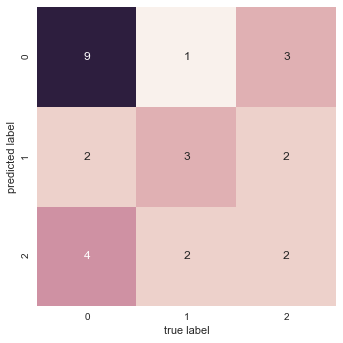

In [209]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(yrf_test, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [210]:
from sklearn import metrics
print(metrics.classification_report(ypred, yrf_test))

             precision    recall  f1-score   support

        Bad       0.60      0.69      0.64        13
       Good       0.50      0.43      0.46         7
    Neutral       0.29      0.25      0.27         8

avg / total       0.49      0.50      0.49        28



In [211]:
from sklearn.cross_validation import cross_val_score
cross_val_score(model, Xtrain, ytrain, cv=4)

array([ 0.4       ,  0.64285714,  0.57142857,  0.46153846])

In [176]:
# apply the ML algorithm here
from sklearn.svm import SVC
svc = SVC(kernel='rbf', class_weight='balanced')



In [177]:
svc.get_params().keys()

dict_keys(['C', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [225]:
from sklearn.grid_search import GridSearchCV
param_grid = {'C': [0.05, 0.1, 0.5, 1, 5, 10, 50], 'gamma': [1E-20 , 1E-15, 1E-12, 1E-10, 0.00001]}
grid = GridSearchCV(svc, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

Wall time: 267 ms
{'C': 1, 'gamma': 1e-12}


In [226]:
model = grid.best_estimator_


In [213]:
# apply the ML algorithm here
from sklearn.svm import SVC
svc_sig = SVC(kernel='sigmoid')

svc_sig.get_params().keys()

dict_keys(['C', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [218]:
param_grid = {'C': [0.05, 0.1, 0.5, 1, 5, 10, 50], 'gamma': [1E-20 , 1E-15, 1E-12, 1E-10, 0.00001], 'coef0': [-10,-7, -5, -3, -2 , -1,  0, 1, 2]}

In [219]:
grid = GridSearchCV(svc_sig, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

Wall time: 2.21 s
{'C': 5, 'coef0': -5, 'gamma': 1e-12}


In [221]:
model = grid.best_estimator_

In [106]:
wb_test = wb[['Country Name','Indicator Name','2000']]
wb_test.head()

,Country Name,Indicator Name,2000
0,Aruba,Urban population (% of total),46.717000
1,Aruba,Urban population,42444.000000
2,Aruba,Urban population growth (annual %),1.182632
3,Aruba,"Population, total",90853.000000
4,Aruba,Population growth (annual %),2.055027


In [107]:
# Xtest

df_test_set = pd.DataFrame()
for indi in set_saved_indi_filter:
    df_temp = wb_test[wb_test['Indicator Name'] == indi]
    df_test_set = pd.concat([df_test_set, df_temp], ignore_index = True, axis = 0)

print(df_test_set.shape)
df_test_set.head()


(16896, 3)


,Country Name,Indicator Name,2000
0,Aruba,Terrestrial protected areas (% of total land a...,0.48
1,Afghanistan,Terrestrial protected areas (% of total land a...,0.36
2,Angola,Terrestrial protected areas (% of total land a...,6.97
3,Albania,Terrestrial protected areas (% of total land a...,0.52
4,Andorra,Terrestrial protected areas (% of total land a...,9.25


In [108]:
len(wb['Country Name'].unique())

264

In [110]:
16896/264

64.0

In [111]:
set_test = set(wb['Country Name']) - set(country_class_y['Country Name'])

df_test_set_country = pd.DataFrame()
for country in set_test:
    # print(country)
    df_temp = df_test_set[df_test_set['Country Name'] == country]
    df_test_set_country = pd.concat([df_test_set_country, df_temp], ignore_index = True, axis = 0)

In [112]:
len(set_test)

208

In [113]:
df_test_set_country.head()

,Country Name,Indicator Name,2000
0,Bahrain,Terrestrial protected areas (% of total land a...,2.78
1,Bahrain,Electricity production from natural gas source...,100.00
2,Bahrain,Forest area (sq. km),3.70
3,Bahrain,"Other greenhouse gas emissions, HFC, PFC and S...",236.00
4,Bahrain,Electricity production from nuclear sources (%...,0.00


In [116]:
df_vietnam = df_test_set_country[df_test_set_country['Country Name'] == 'Vietnam']
df_vietnam = df_vietnam.fillna(0)

In [117]:
df_vietnam.isnull().sum()

Country Name      0
Indicator Name    0
2000              0
dtype: int64

In [118]:
Xtest = pd.DataFrame(df_vietnam['2000'].values.reshape(1,64))

In [222]:
ytest = model.predict(Xtest)
ytest

array(['Bad'], dtype=object)

In [227]:
from sklearn.cross_validation import cross_val_score
cross_val_score(model, Xtrain, ytrain, cv=8)

array([ 0.5       ,  0.625     ,  0.625     ,  0.42857143,  0.42857143,
        0.5       ,  0.5       ,  0.5       ])

In [224]:
from sklearn.cross_validation import cross_val_score
cross_val_score(model, Xtrain, ytrain, cv=8)

array([ 0.5       ,  0.5       ,  0.5       ,  0.42857143,  0.57142857,
        0.5       ,  0.5       ,  0.5       ])

In [413]:
list_deleted_indi = []
df_test = pd.DataFrame()

for label in country_class_y['Label'].unique():
    for indicator in wb_meta_indi['INDICATOR_NAME']:
        df_temp = pd.DataFrame()
        df_temp = df_2000[(df_2000['Indicator Name'] == indicator) & (df_2000_label['Label'] == label)]
        print(df_temp)
        #df_temp = df_temp.fillna(df_temp.mean())
        
        if(df_temp['2000'].isnull().values.all()):
            #print(df_temp)
            list_deleted_indi.append(indicator) 
        
        if((not df_temp['2000'].isnull().values.all()) & df_temp.isnull().values.any()):
            df_temp = df_temp.fillna(df_temp.mean())
            df_test = pd.concat( [df_test,df_temp], ignore_index=True, axis=0)
            print(df_temp)
            break
        
        df_test = pd.concat( [df_test,df_temp], ignore_index=True, axis=0)
        
    if((not df_temp['2000'].isnull().values.all()) & df_temp.isnull().values.any()):
        break

print(list_deleted_indi)
df_test

       Country Name                 Indicator Name    2000
0            France  Urban population (% of total)  75.871
80           Sweden  Urban population (% of total)  84.026
160  United Kingdom  Urban population (% of total)  78.651
240          Cyprus  Urban population (% of total)  68.648
320      Luxembourg  Urban population (% of total)  84.216
400           Malta  Urban population (% of total)  92.368
480        Portugal  Urban population (% of total)  54.399
560         Belgium  Urban population (% of total)  97.128
640         Denmark  Urban population (% of total)  85.100
720     Switzerland  Urban population (% of total)  73.322
800          Latvia  Urban population (% of total)  68.067
880           Italy  Urban population (% of total)  67.222
960         Croatia  Urban population (% of total)  55.587
       Country Name    Indicator Name        2000
1            France  Urban population  46214921.0
81           Sweden  Urban population   7454878.0
161  United Kingdom  Urb

4405   NaN  
            Country Name                                     Indicator Name  \
2325             Hungary  Poverty headcount ratio at $1.90 a day (2011 P...   
2405              Poland  Poverty headcount ratio at $1.90 a day (2011 P...   
2485           Argentina  Poverty headcount ratio at $1.90 a day (2011 P...   
2565            Bulgaria  Poverty headcount ratio at $1.90 a day (2011 P...   
2645              Norway  Poverty headcount ratio at $1.90 a day (2011 P...   
2725             Iceland  Poverty headcount ratio at $1.90 a day (2011 P...   
2805              Brazil  Poverty headcount ratio at $1.90 a day (2011 P...   
2885             Austria  Poverty headcount ratio at $1.90 a day (2011 P...   
2965            Thailand  Poverty headcount ratio at $1.90 a day (2011 P...   
3045       United States  Poverty headcount ratio at $1.90 a day (2011 P...   
3125            Malaysia  Poverty headcount ratio at $1.90 a day (2011 P...   
3205             Ukraine  Poverty headc

,Country Name,Indicator Name,2000
0,France,Urban population (% of total),7.587100e+01
1,Sweden,Urban population (% of total),8.402600e+01
2,United Kingdom,Urban population (% of total),7.865100e+01
3,Cyprus,Urban population (% of total),6.864800e+01
4,Luxembourg,Urban population (% of total),8.421600e+01
5,Malta,Urban population (% of total),9.236800e+01
6,Portugal,Urban population (% of total),5.439900e+01
7,Belgium,Urban population (% of total),9.712800e+01
8,Denmark,Urban population (% of total),8.510000e+01
9,Switzerland,Urban population (% of total),7.332200e+01


In [114]:
# reshape the matrix feature
col = list(set_saved_indi_filter)
ind = list(country_class_y['Country Name'])

for country in country_class_y['Country Name']:
    Xtrain.loc[country] = df_test_clean[df_test_clean['Country Name'] == country]['2000'].values
Xtrain.shape

Xtrain = pd.DataFrame(np.zeros(shape = (56, 64)), columns = col, index = ind)
for country in set_test:
    df_test_country[]
    

SyntaxError: invalid syntax (<ipython-input-114-c4be017c096d>, line 11)